In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

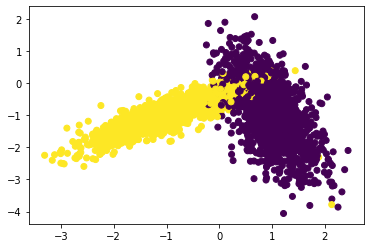

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

## Implementing Custom Random Search Cross Validation 

In [3]:
from sklearn.metrics import accuracy_score


def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    
###### defining function to generat 10 random numbers
    
    def generate_param(a):
        if a[0] < a[1]:
            parameter = np.random.uniform(a[0],a[1],10)
            parameter = list(parameter.astype(int))
            parameter.sort()
            if len(parameter) == len(set(parameter)):
                return parameter
            else:
                parameter = generate_param(a)
                return parameter
        else:
            print('Error: param_range: its a tuple like (a,b) a < b ')
            return 0
        
        
        
        
#### defining a function for dividing the data into given number of folds
    
    def dividing_data(x_train,y_train,folds):
        a,b= len(x_train)/folds,0.0
        x_train = x_train.tolist()
        y_train = y_train.tolist()
        group = []
        label = []
        while b < len(x_train):
            group.append(x_train[int(b):int(b + a)])
            label.append(y_train[int(b):int(b + a)])
            b += a
        return group,label
    

    
    
#### Calling the above defined functions to take parameter and divided data into given number of folds

    params = generate_param(param_range)
    temp = len(x_train)/folds
    temp = int(temp) 
    groups,labels = dividing_data(x_train,y_train,folds)  
    train_scores,test_scores = [],[]
    
    
#### running loop to calculate accuracy for each given value of parameter in in given range
    
    for k in tqdm(params):
        
        trainscores_folds,testscores_folds = [],[]
        
#### running another loop for calculating accuaracy for each divided data ( k folds) 
        
        
        for i in range(folds):
        
            X_train = [groups[iter] for iter in range(folds) if iter != i]
            X_train = [j for sublist in X_train for j in sublist]
            Y_train = [labels[iter] for iter in range(folds) if iter != i]
            Y_train = [j for sublist in Y_train for j in sublist]
            X_test  = groups[i]
            Y_test  = labels[i]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))
    
    return train_scores, test_scores,params

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


#### initializing the value of K,parameter and folds

classifier = KNeighborsClassifier()
param_range = (1,25)
folds = 6

#### calling the randomsearch cv function

trainscores,testscores,params = RandomSearchCV(X_train,y_train,classifier, param_range, folds)

100%|██████████| 10/10 [00:27<00:00,  2.75s/it]


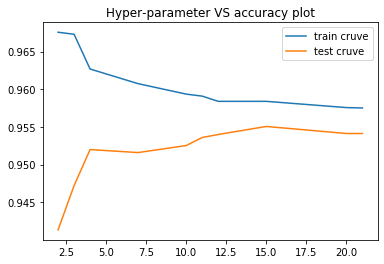

In [5]:
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [6]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

#### plotting graphs for each value of k which are randomly generated in param

def knn_comparision(X,y, k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plotting decision regions
    plot_decision_regions(X, y, clf=clf, legend=2)

    # Adding axes notations
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Knn with K='+ str(k))
    plt.show()


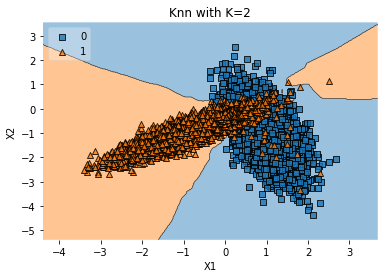

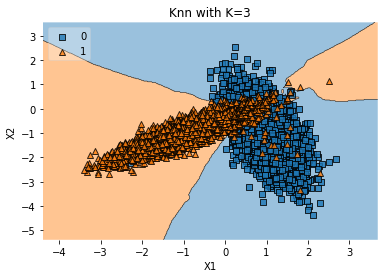

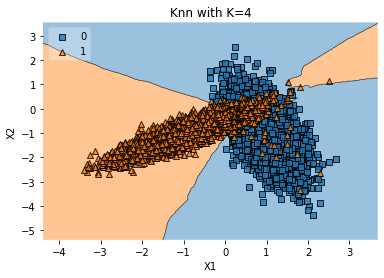

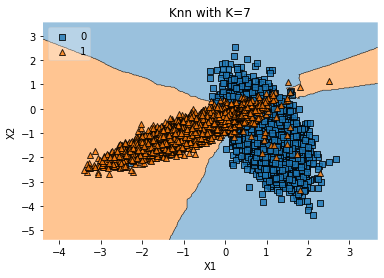

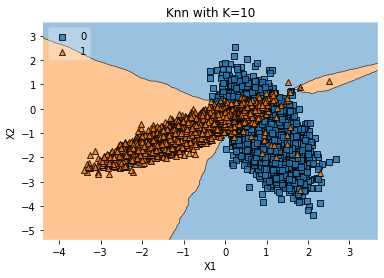

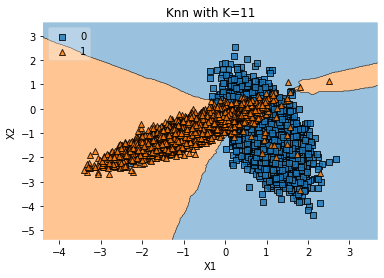

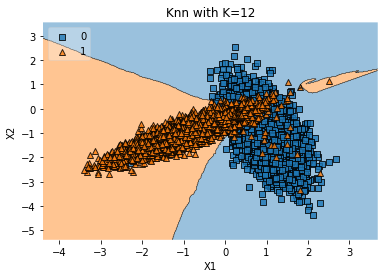

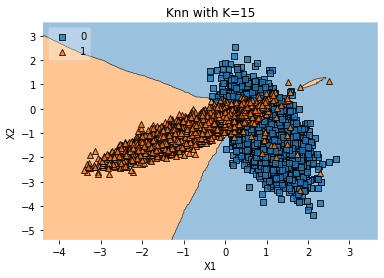

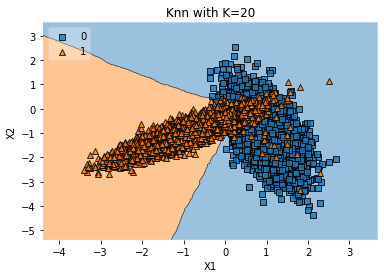

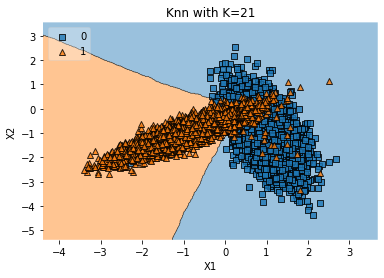

In [7]:
for i in params:
    knn_comparision(X_train,y_train, i)

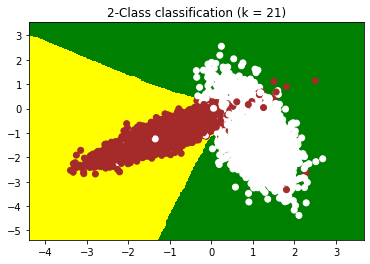

In [8]:
def plot_decision_boundary(X1, X2, y, clf):

    cmap_light = ListedColormap(['green', 'cyan', 'yellow'])   #'#FFAAAA', '#AAFFAA'#AAAAFF
    cmap_bold = ListedColormap(['white', '#00FF00', 'brown'])     ###FF0000

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

    
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)